In [1]:
import pandas as pd
import numpy as np 
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from PyFiles import Functions as func
from PyFiles import Preprocessing as process

In [2]:
df = pd.read_csv('FData/Headlines/New/SPYHeadlinesGrouped.csv')

### Model 1

In [3]:
model_num = '1_1'
max_feat = 5000 
min_df = 1
max_df = 1.0 
ngram = (1,1)
pre_type = 'stem'

new_df, x_train, x_test, y_train, y_test, preprocessing_dict = process.preprocess_tts(df, pre_type = pre_type, 
                                                                      ngram = ngram,  max_features = max_feat, 
                                                                             min_df = min_df, max_df = max_df)

Getting Preprocessing Objects and Transforming Data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:48<00:00, 16.30s/it]

Train:	1873
1    1033
0     840
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test:	804
1    444
0    360
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Train Accuracy: 0.8825413774693006
Test Accuracy: 0.5335820895522388


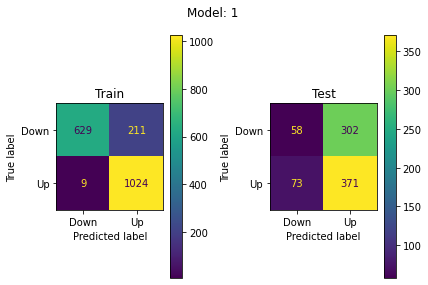

In [30]:
models = {'Log': LogisticRegression(max_iter = 2500), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'LDA': LinearDiscriminantAnalysis(),
          'Gaussian': GaussianNB(), 
           'LinearSVC': LinearSVC(max_iter = 2500, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

new_models = func.stacked_model(models)
stacked = new_models['Stacked']
stacked.n_jobs = -1
stacked.fit(x_train, y_train)
print(f'Train Accuracy: {stacked.score(x_train, y_train)}')
print(f'Test Accuracy: {stacked.score(x_test, y_test)}')

fig, ax = plt.subplots(1,2)
plt.suptitle(f'Model: {model_num}')
plot_confusion_matrix(stacked, x_train, y_train, ax = ax[0], display_labels = ['Down', 'Up']) 
plot_confusion_matrix(stacked, x_test, y_test, ax = ax[1], display_labels = ['Down', 'Up']) 
ax[0].set_title('Train')
ax[1].set_title('Test')
plt.tight_layout() 
plt.savefig(f'Images/Sklearn/CM_{model_num}.png')

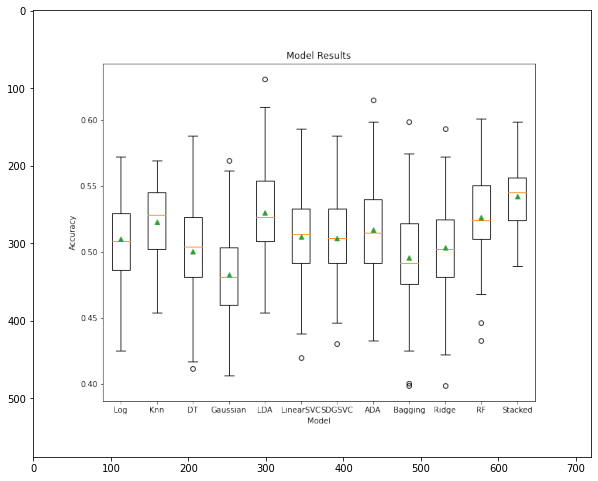

In [20]:
#getting results and model
result_dict = func.test_models(x_train, y_train, new_models, n_jobs = 13)
func.plot_model_results(result_dict, filepath = f'Images/Sklearn/ACC_{model_num}.png')

In [6]:
assert False

AssertionError: 

### Model 2

In [37]:
model_num = '2_1'
max_feat = 6000 
min_df = 5
max_df = 1.0 
ngram = (1,2)
pre_type = 'stem'

new_df, x_train, x_test, y_train, y_test, preprocessing_dict = process.preprocess_tts(df, pre_type = pre_type, 
                                                                      ngram = ngram,  max_features = max_feat, 
                                                                             min_df = min_df, max_df = max_df)

Getting Preprocessing Objects and Transforming Data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:49<00:00, 16.65s/it]

Train:	1873
1    1033
0     840
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test:	804
1    444
0    360
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Train Accuracy: 0.5205552589428724
Test Accuracy: 0.5348258706467661


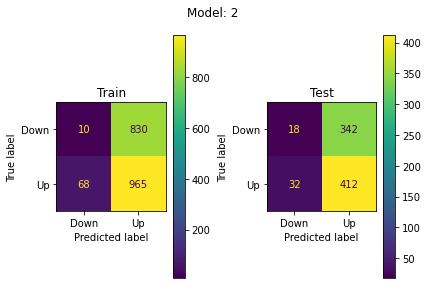

In [32]:
models = {'Log': LogisticRegression(max_iter = 2500), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'LDA': LinearDiscriminantAnalysis(),
          'Gaussian': GaussianNB(), 
           'LinearSVC': LinearSVC(max_iter = 2500, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

new_models = func.stacked_model(models)
stacked = new_models['Stacked']
stacked.n_jobs = -1
stacked.fit(x_train, y_train)
print(f'Train Accuracy: {stacked.score(x_train, y_train)}')
print(f'Test Accuracy: {stacked.score(x_test, y_test)}')

fig, ax = plt.subplots(1,2)
plt.suptitle(f'Model: {model_num}')
plot_confusion_matrix(stacked, x_train, y_train, ax = ax[0], display_labels = ['Down', 'Up']) 
plot_confusion_matrix(stacked, x_test, y_test, ax = ax[1], display_labels = ['Down', 'Up']) 
ax[0].set_title('Train')
ax[1].set_title('Test')
plt.tight_layout() 
plt.savefig(f'Images/Sklearn/CM_{model_num}.png')

In [38]:
# getting results and model
result_dict = func.test_models(x_train, y_train, new_models, n_jobs = 13)

Evaluating STACKED: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [55:31<00:00, 277.59s/it]


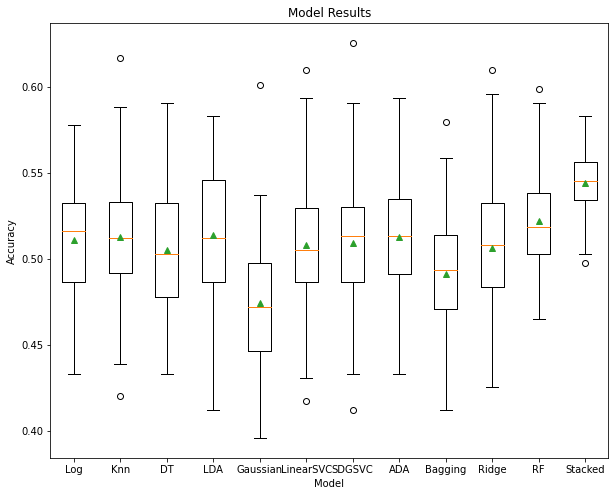

In [39]:
func.plot_model_results(result_dict, filepath = f'Images/Sklearn/ACC_{model_num}.png')

In [ ]:
assert False

### Model 3

In [33]:
model_num = '3_1'
max_feat = 5000 
min_df = 2
max_df = 1.0 
ngram = (1,2)
pre_type = 'lemmet'

new_df, x_train, x_test, y_train, y_test, preprocessing_dict = process.preprocess_tts(df, pre_type = pre_type, 
                                                                      ngram = ngram,  max_features = max_feat, 
                                                                             min_df = min_df, max_df = max_df)

Getting Preprocessing Objects and Transforming Data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.52s/it]

Train:	1873
1    1033
0     840
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test:	804
1    444
0    360
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Train Accuracy: 0.5136145221569675
Test Accuracy: 0.5485074626865671


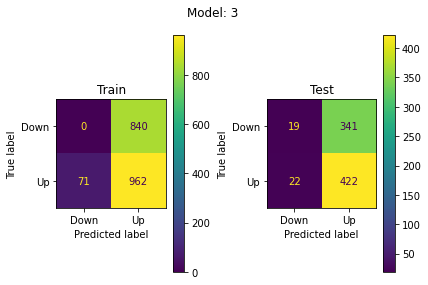

In [34]:
models = {'Log': LogisticRegression(max_iter = 2500), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'LDA': LinearDiscriminantAnalysis(),
          'Gaussian': GaussianNB(), 
           'LinearSVC': LinearSVC(max_iter = 2500, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

new_models = func.stacked_model(models)
stacked = new_models['Stacked']
stacked.n_jobs = -1
stacked.fit(x_train, y_train)
print(f'Train Accuracy: {stacked.score(x_train, y_train)}')
print(f'Test Accuracy: {stacked.score(x_test, y_test)}')

fig, ax = plt.subplots(1,2)
plt.suptitle(f'Model: {model_num}')
plot_confusion_matrix(stacked, x_train, y_train, ax = ax[0], display_labels = ['Down', 'Up']) 
plot_confusion_matrix(stacked, x_test, y_test, ax = ax[1], display_labels = ['Down', 'Up']) 
ax[0].set_title('Train')
ax[1].set_title('Test')
plt.tight_layout() 
plt.savefig(f'Images/Sklearn/CM_{model_num}.png')

In [35]:
# getting results and model
result_dict = func.test_models(x_train, y_train, new_models, n_jobs = 13)

Evaluating STACKED: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [46:31<00:00, 232.61s/it]


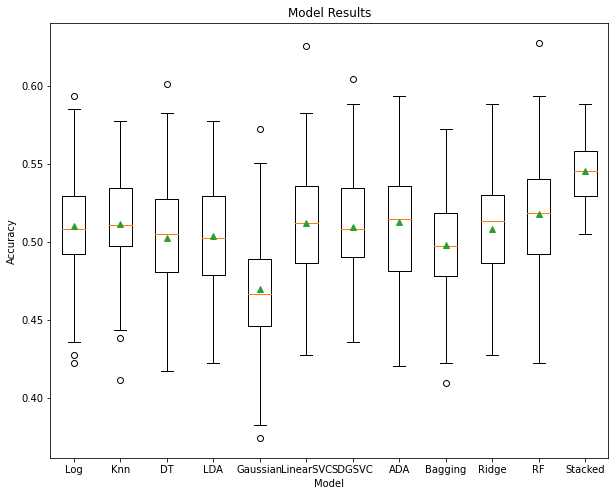

In [36]:
func.plot_model_results(result_dict, filepath = f'Images/Sklearn/ACC_{model_num}.png')

In [ ]:
assert False